# k Means
## Fundamentos de la técnica

k Means es uno de los métodos de clustering más usados en machine learning.
Es un método iterativo, basado en centroides, no supervisado que particiona un conjunto de datos en grupos similares basado en la distancia entre sus centroides. El centroide es la media o mediana de todos los puntos dentro un cluster dependiendo las características de los datos (Kavlakoglu y Winland, s.f.).

## Modelo Matemático
### Objetivo
Dado un conjunto de datos
$X = {x_1, \ldots, x_n}$ con $x_i \in ℝ^d$ y un número de clústeres $k$.

Agrupar puntos en $k$ clústeres minimizando la varianza intra-clúster.

$$arg\ min_C \sum_{i=1}^k{\sum_{x \in C_i}} ||x_j - \mu_i||^2$$

Donde:
- $C_i$ es el conjunto de puntos asignados al cluster $i$.
- $\mu_i = \frac{1}{|C_i|}\sum_{xj \in C_i} x_j$ es el centroide de $C_i$

## Pipeline
### Preprocesamiento

In [ ]:
# Librerías y funciones usadas en preprocesamiento:
# - sklearn.datasets.make_blobs: genera datos sintéticos en forma de blobs (útil para clustering y pruebas).
# - matplotlib.pyplot (plt): biblioteca para visualización de datos (gráficas 2D).
# - pandas (pd): estructuras DataFrame para manipulación y resumen de datos tabulares.
# - sklearn.preprocessing.StandardScaler: transforma características para tener media 0 y desviación estándar 1 (estandarización).
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Generar datos sintéticos con 4 centros (clusters) para el ejemplo
blob_centers = make_blobs(n_samples=100, centers=4, random_state=42)
# Construir DataFrame con las coordenadas X, Y
df = pd.DataFrame(blob_centers[0], columns=['X', 'Y'])
print(df.describe())

# Estandarizar las características — paso recomendado antes de aplicar k-means porque el algoritmo usa distancias
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

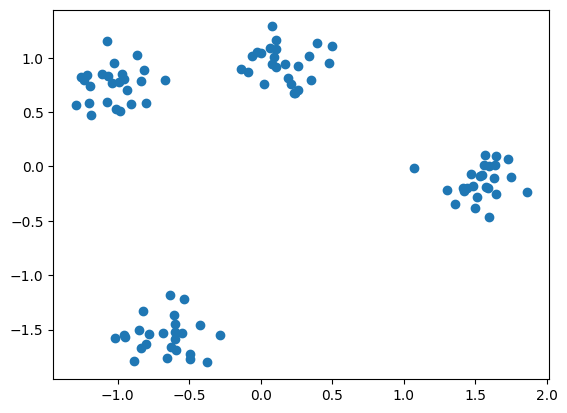

In [ ]:
# Visualización preliminar de los datos escalados (sin etiquetas):
# - plt.scatter: muestra la distribución de puntos para observar la estructura antes del clustering.
plt.scatter(df_scaled[:, 0], df_scaled[:, 1])

### Prediction

In [ ]:
# Clustering con KMeans:
# - sklearn.cluster.KMeans: implementación del algoritmo k-means basado en centroides.
# - Parámetros importantes: n_clusters (k), random_state (reproducibilidad), n_init (veces que se reinicia para mejor solución).
# - .fit(X): ajusta el modelo encontrando centroides que minimizan la inercia (suma de distancias al cuadrado dentro de clusters).
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

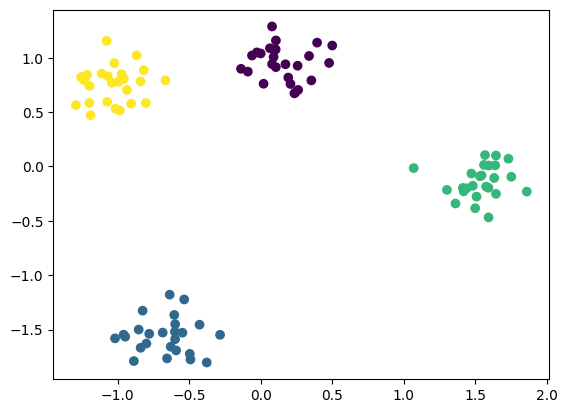

In [ ]:
# Visualizar clusters asignados por KMeans utilizando las etiquetas (labels_):
# - kmeans.labels_: array con la asignación de clúster para cada muestra tras el fit.
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_)

In [ ]:
# Función auxiliar para predecir el cluster de un nuevo patrón:
# - numpy (np): para convertir el patrón a un array y darle la forma que espera KMeans (1, -1).
# - kmeans_model.predict(X_new): asigna cada nueva muestra al clúster más cercano según los centroides aprendidos.
import numpy as np
def predict_cluster(pattern, kmeans_model):
    pattern = np.array(pattern).reshape(1, -1)
    predicted_cluster = kmeans_model.predict(pattern)[0]
    print(f"El patrón {pattern.tolist()[0]} pertenece al clúster: {predicted_cluster}")
    return predicted_cluster

In [ ]:
new_pattern = [1.5, -0.5]

predicted_cluster = predict_cluster(new_pattern, kmeans)

El patrón [1.5, -0.5] pertenece al clúster: 2


### Model Evaluation

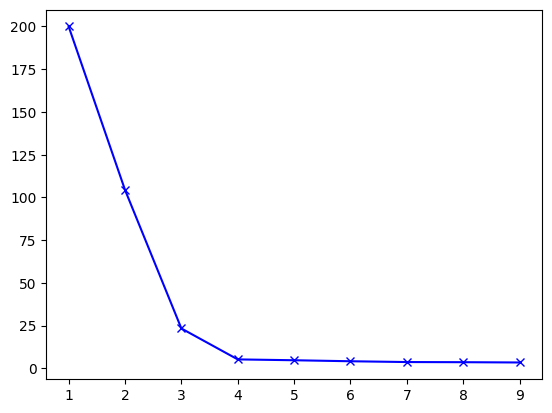

In [ ]:
# Evaluación: método del codo (elbow) usando la inercia (inertia_):
# - inertia_: suma de las distancias al cuadrado de los puntos a su centroide; medida de la compacidad de los clusters.
# - Se calcula inertia_ para diferentes k y se grafica para identificar el 'codo' donde aumentar k deja de mejorar significativamente.
J = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    J.append(kmeans.inertia_)

plt.plot(range(1, 10), J, 'bx-')

## Referencias bibliográficas

- Kavlakoglu, E., y Winland, V. (s.f.). What is k-means clustering?. IBM. https://www.ibm.com/think/topics/k-means-clustering